# 18기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [1]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [3]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.nunique()

Gender                     2
Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64

In [10]:
len(df) #200개의 데이터

200

c:\Users\momo8\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

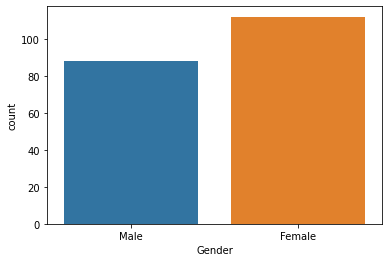

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df['Gender']) #성별 비율 보기

(array([0.02980769, 0.01826923, 0.03269231, 0.02788462, 0.01538462,
        0.025     , 0.01442308, 0.00961538, 0.00576923, 0.01346154]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

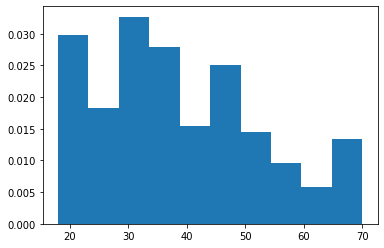

In [6]:
plt.hist(df['Age'],density=True)

30대 언저리가 가장 많아보임

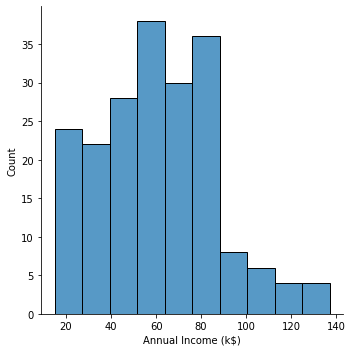

In [24]:
sns.displot(df['Annual Income (k$)'])
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

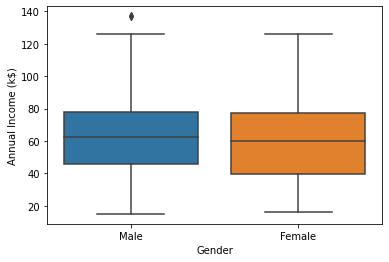

In [25]:
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)

남자와 여자의 평균 임금차이는 크지 않음을 알 수 있음

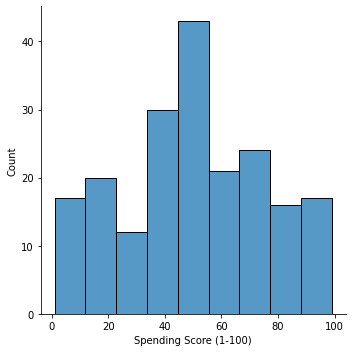

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

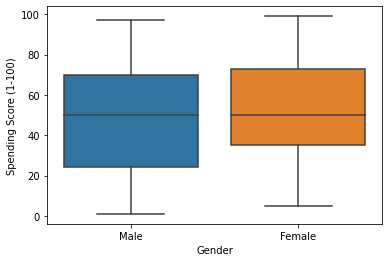

In [26]:
sns.displot(df['Spending Score (1-100)'])
plt.show()
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)

Spending Score가 남녀 비슷함

In [53]:
X = df.drop("Gender", axis=1)
y=df['Gender']

In [54]:
X=X.drop('Age',axis=1)
X

,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,
1,15,39,0
2,15,81,0
3,16,6,2
4,16,77,0
5,17,40,0
...,...,...,...
196,120,79,0
197,126,28,2
198,126,74,0


In [55]:
from sklearn.preprocessing import MinMaxScaler
#민맥스 스케일 진행

columns = X.columns.tolist() #컬럼명을 리스트로 바꾸기

scaler = MinMaxScaler()

for col in columns:
    X.loc[:, col] = scaler.fit_transform(np.array(X[col]).reshape(-1, 1))

In [56]:
#KMEANS 활용
from sklearn.cluster import KMeans
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)
# 정규화된 데이터에 학습
model.fit(X)
X['cluster'] = model.fit_predict(X)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


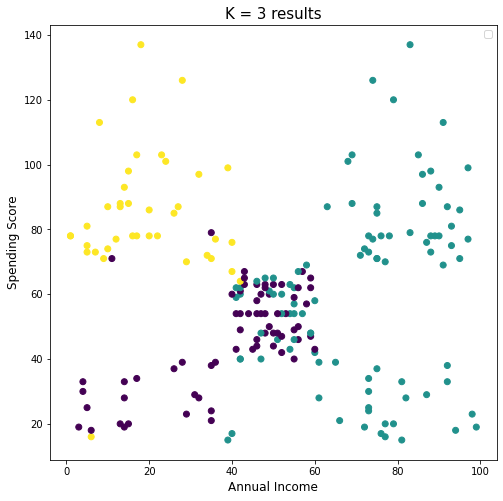

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

#plt.scatter(df.loc[df['cluster'] == 3, 'Annual Income (k$)'], df.loc[df['cluster'] == i, 'Spending Score (1-100)'], 
plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'],c=X['cluster'])

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()

군집 개수 3일때

In [58]:
from sklearn.metrics import silhouette_samples, silhouette_score
average_score = silhouette_score(X, X['cluster'])
print('k=3일때 실루엣스코어: {:.3f}'.format(average_score))

k=3일때 실루엣스코어: 0.735


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


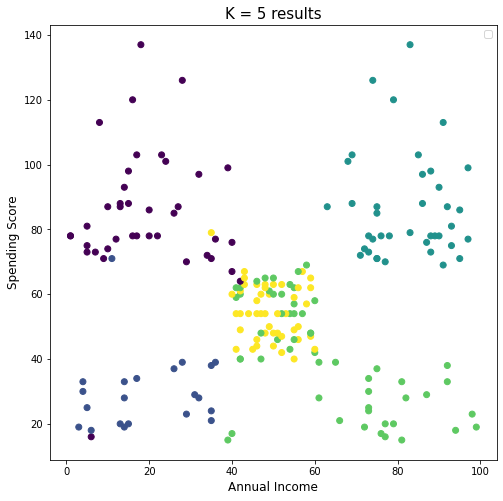

In [46]:
#KMEANS 활용
from sklearn.cluster import KMeans
k = 5

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)
# 정규화된 데이터에 학습
model.fit(X)
X['cluster'] = model.fit_predict(X)
plt.figure(figsize = (8, 8))

#plt.scatter(df.loc[df['cluster'] == 3, 'Annual Income (k$)'], df.loc[df['cluster'] == i, 'Spending Score (1-100)'], 
plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'],c=X['cluster'])

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()

군집개수 5일때가 3일때보다 더 잘 군집화 되는 것 같다.


In [52]:
from sklearn.metrics import silhouette_samples, silhouette_score
average_score = silhouette_score(X, X['cluster'])
print('k=5일때 실루엣스코어: {:.3f}'.format(average_score))

실루엣스코어: 0.808
